<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Unpaired_Image_to_Image_Translation_using_Cycle_Consistent_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks**

논문 링크: https://arxiv.org/abs/1703.10593

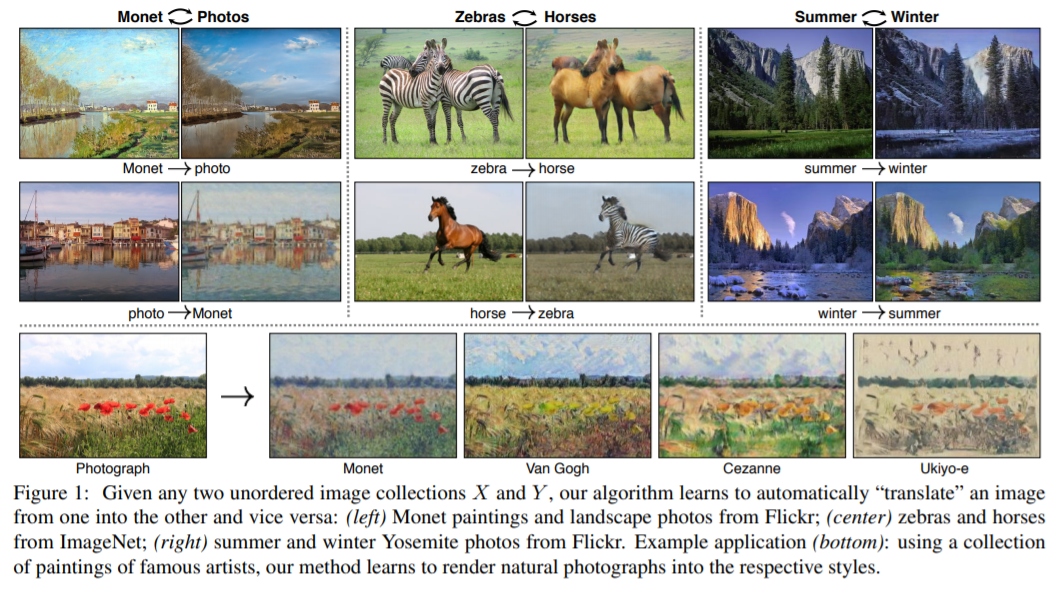

먼저 결과물인 위의 그림 Figure 1을 보면 collection style transfer, object transfiguration, season transfer, photo enhancement 등에 매우 좋은 퀄리티를 보여주는 것을 알 수 있다.

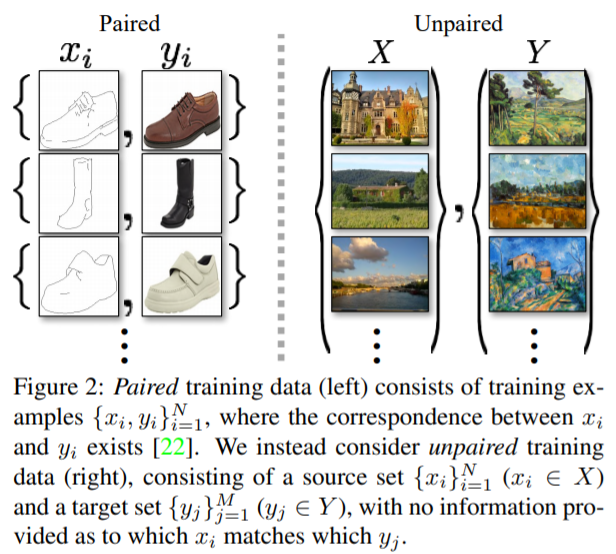

CycleGAN은 기존 Pix2Pix 연구의 연장선이라고 생각하면 된다. 본 논문은 위의 그림 Figure 2의 오른쪽 부분과 같이 **짝지어진 예시 없이(Unpaired) x라는 도메인으로부터 얻은 이미지를 타깃 도메인 y로 바꾸는 것**이 목표이다.

## **CycleGAN 구조**

### **Architecture**

먼저 Architecture에 대해 알아보겠다.

모델의 구조의 경우 기존에 neural style transfer와 super-resolution에서 좋은 성능을 보인 구조를 채택했다. 먼저, Generator의 경우는 U-Net Architecture와 ResNet Architecture로 총 두가지가 있다. 전자의 경우는 input data의 detail이 마지막 layer까지 잘 전달되지만, skip-connection을 사용해 depth가 없기 때문에 생성된 결과가 다르다. 그리고 후자의 경우는 Depth도 없고 bottleneck도 없어 detail도 잘 전달되고 퀄리티가 좋지만, bottleneck이 없기 때문에 계산 비용이 비싸다. 그리고 Discriminator의 경우 DCGAN과 PatchGAN이 있다.

### **Loss function**

다음으로는 Loss function에 대해 알아보겠다.

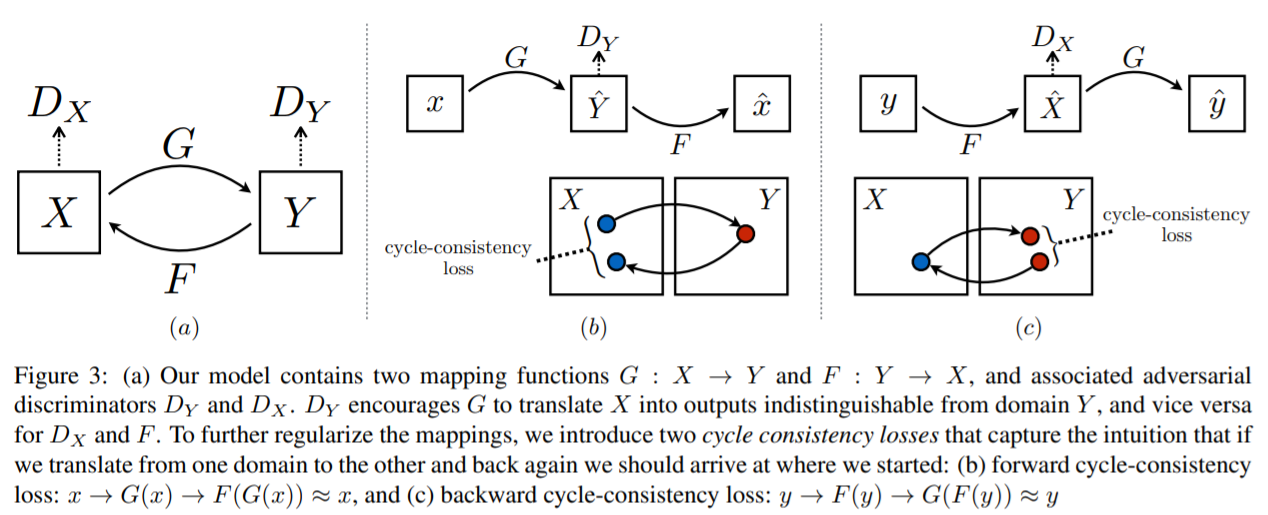

본 논문에서는 위에서 언급했듯이 짝지어진 학습 예시 없이(unpaired) 이미지 모음에서 특징을 파악한 후 다른 이미지 모음에 어떻게 이 특징을 적용(translate)할지를 고민한 끝에 위의 그림 Figure 3과 같은 네트워크 구조를 만들었다.

위의 구조를 자세히 설명하자면, 일단 x는 X에 속하는 sample이고, y는 Y에 속하는 sample이다. 그리고 위의 그림 Figure 3의 (a)와 같이 두 개의 mapping 함수 G: X -> Y와 F: X -> Y가 모델에 포함된다. 또한, 두 개의 mapping 함수가 있듯이 두 개의 adversarial discriminator인 D(x)와 D(y)가 있다.

그리고 loss function같은 경우는 기존 GAN loss인 adversarial loss와 CycleGAN에서 추가한 cycle consistency loss가 있다. 이 부분도 자세히 설명을 하자면,

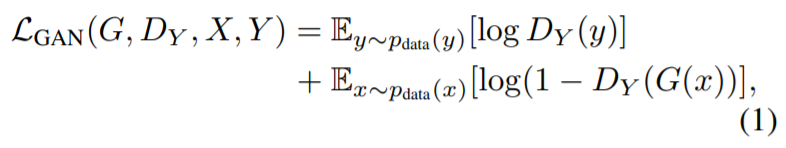

먼저 위의 식은 G: x -> Y와 D(Y)에 대한 adversarial loss이다. 기존 vanilla gan loss와 같다고 생각하면 된다. 즉, min(G)max(D(Y))L(GAN)(G, D(Y), X, Y)로 나타낼 수 있다. 마찬가지로 F: Y -> X와 D(X)에 대한 loss도 위와 유사하다. 즉, 최종적으로 min(F)max(D(X))L(GAN)(F, D(X), Y, X)로 나타낼 수 있다.

만일 adversarial loss만 사용하는 경우는 mode collapse 문제가 생길 수 있으므로 adversarial loss 단독으로는 mapping 함수를 제대로 학습하기 힘들다. 따라서 가능한 mapping 함수의 space를 줄이기 위해, 위의 그림 Figure 3에서 (b), (c)와 같이 mapping 함수는 cycle-consistent 해야한다.

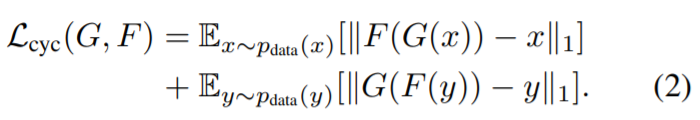

위의 식이 바로 cycle consistency loss이다.

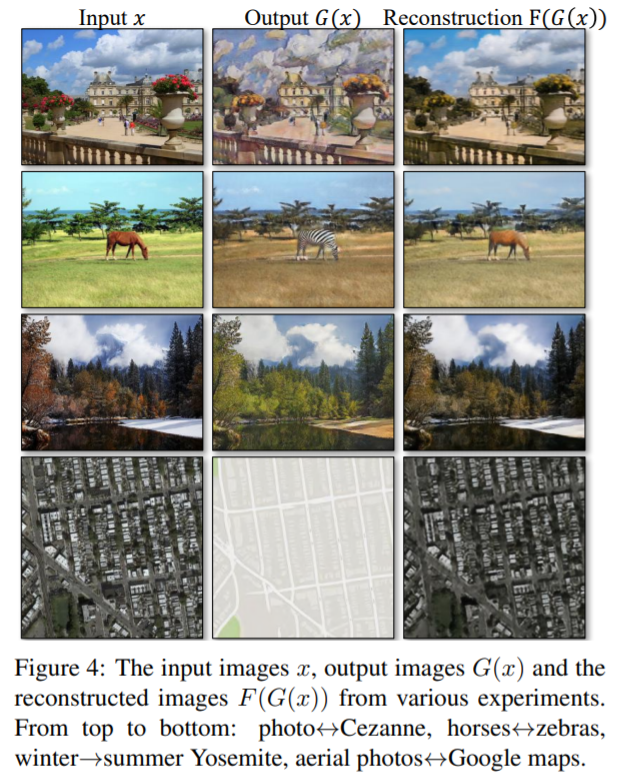

위의 그림 Figure 4가 바로 cycle consistency loss를 유도한 결과이다. F(G(X))가 원래 Input 이미지인 X와 상당히 유사한 것을 확인할 수 있다.

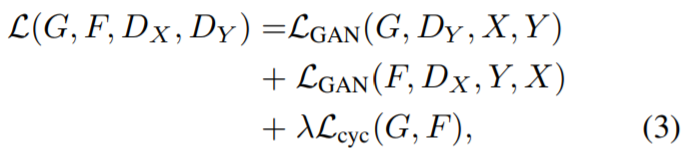

따라서 최종적으로 위와 같이 식이 전개다 된다. λ의 경우는 두 함수의 상대적인 중요도에 따라 결정이 된다. 본 논문에서는 λ값을 10으로 설정했다.

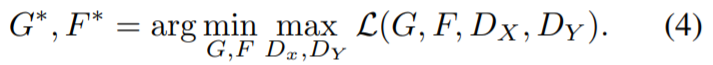

그리고 우리가 구하고자하는 목적은 위와 같은 식이 된다.

뿐만아니라 본 논문에서는 추가적인 기술을 적용했는데, 바로 L(GAN)을 LSGAN 논문에서 나온 **least-square loss**로 대체했다. 따라서 G는 minimize E(x)∼p(data)(x)[(D( (x)) − 1)^2]을 최소화 그리고 D는 E(y)∼p(data)(y)[(D(y) − 1)^2] + E(x)∼p(data)(x)[D((x))^2]를 최소화하는 방향으로 학습이 된다.

(추가적으로 osillation을 줄이기 위해 discriminator에 최신의 generator가 생성한 이미지를 넣는 것이 아닌, 이전에 생성한 이미지 50개를 저장할 수 있는 buffer를 사용하여 지금까지 생성한 이미지를 이용했다.)

## **Experiments**

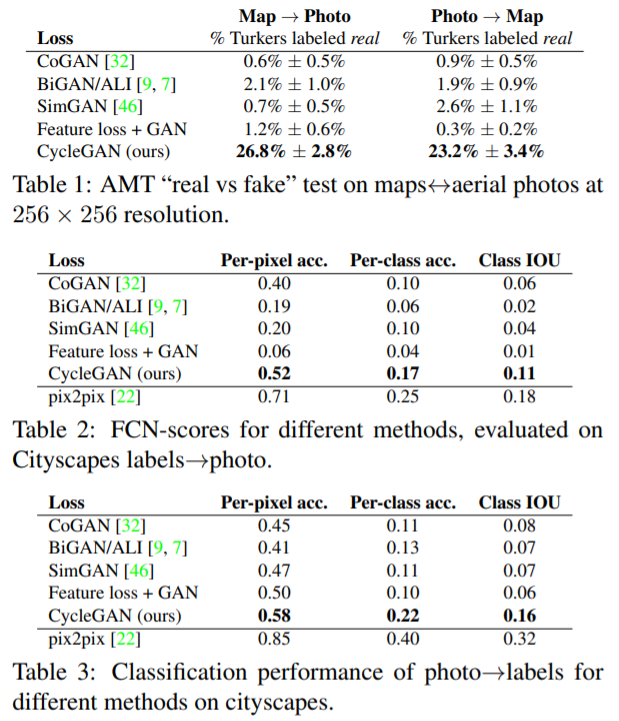

위의 표 Table 1, 2, 3은 각각 AMT perceptual studies, FCN score, Semantic segmentation metrics 점수이다. 특히 사람의 눈으로 평가한 AMT의 경우 매우 높은 점수를 얻었다. 나머지 점수는 pix2pix가 조금 더 우수하다는 것을 알 수 있다.

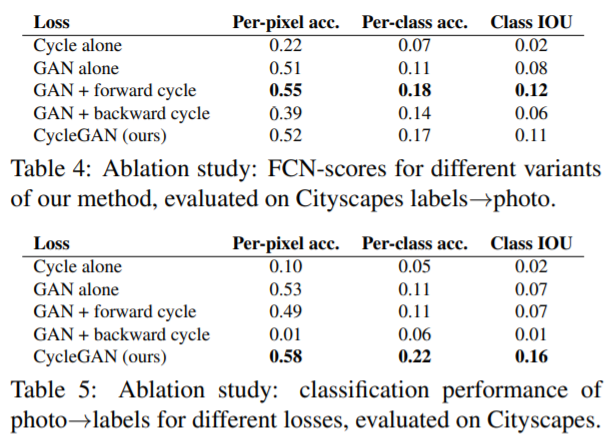

위의 표 Table 4, 5는 loss function을 다양하게 바꾸어가며 실험을 진행한 것이다. 최종적으로 논문에서 사용한 adversarial loss + cycle loss가 가장 성능이 좋았다.

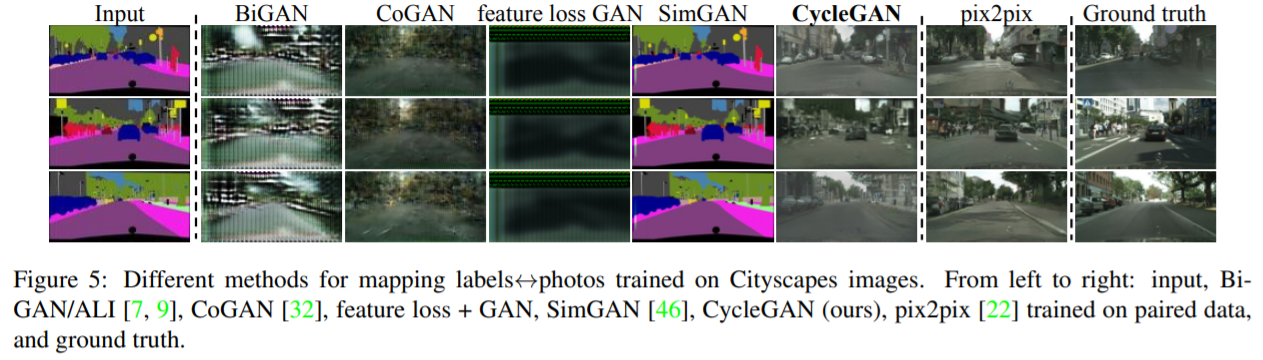

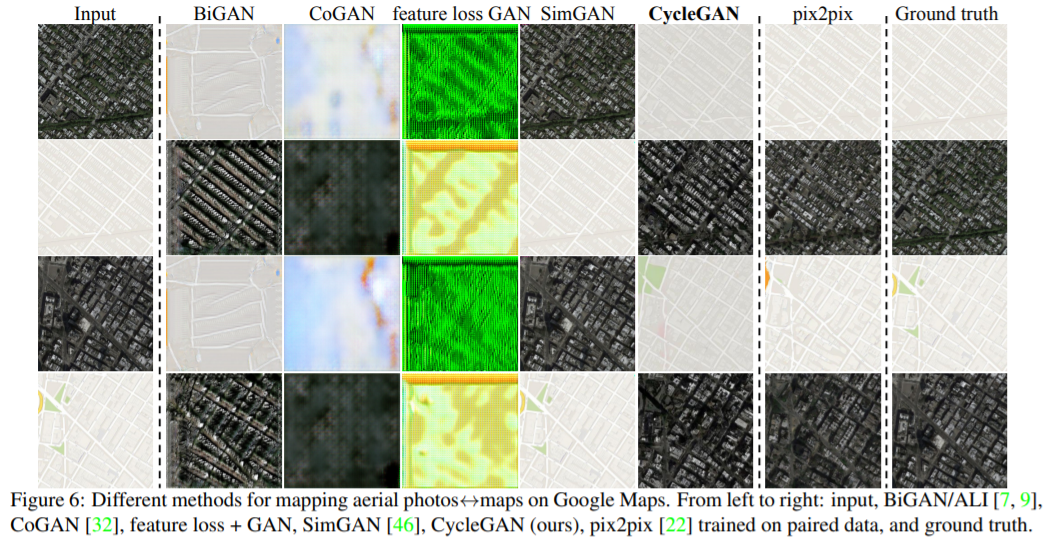

위의 그림 Figure 5, 6 등을 보면 CycleGAN이 좋은 성능을 보이는 것을 알 수 있다. (실험을 통한 결과물 그림이 매우 많기 때문에 논문을 직접보는 것을 추천한다.)

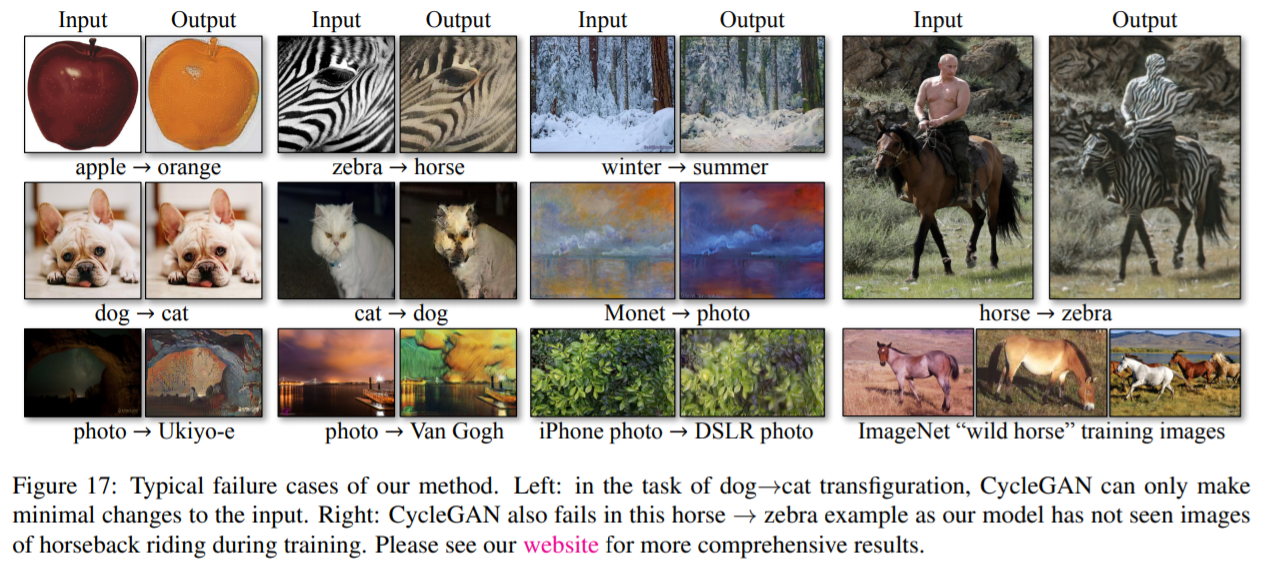

하지만 위의 그림 Figure 17과 같은 몇가지의 한계점이 있었다. 먼저, CycleGAN은 질감은 잘 적용하지만 입력의 모양을 바꾸기가 쉽지 않았는데, 사과를 보면 사과의 모양을 오렌지로 바꾸지 못하고 색만 바뀌어버렸다. 또한, dataset이 불균형하여 말을 타고 있는 사람의 경우 사람과 말을 구분하지 못해 사람도 얼룩으로 만들어버렸다. (논문의 저자는 강연에서 얼룩말을 타고 있는 사람의 사진이 단 1장맊게 되지 않았다고 하였다.)